In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### Imports

In [2]:
# TENSORFLOW #
import tensorflow as tf
from tensorflow.keras import layers, losses
import tensorflow_datasets as tfds

# Other
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import tabulate as tbl

In [3]:
# Load a dataset
(train, valid, test), metadata = tfds.load('cassava', # Plants
                              split = ['train', 'test', 'validation'],
                              as_supervised = True, # Get labels
                              shuffle_files=True, 
                              with_info = True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/5656 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cassava/0.1.0.incomplete4FVQON/cassava-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/1885 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cassava/0.1.0.incomplete4FVQON/cassava-test.tfrecord*...:   0%|          |…

Generating validation examples...:   0%|          | 0/1889 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cassava/0.1.0.incomplete4FVQON/cassava-validation.tfrecord*...:   0%|     …

Dataset cassava downloaded and prepared to /root/tensorflow_datasets/cassava/0.1.0. Subsequent calls will reuse this data.


In [4]:
# Set sizes
train_size = metadata.splits['train'].num_examples
valid_size = metadata.splits['validation'].num_examples
test_size = metadata.splits['test'].num_examples

# Check details
print(f'Training set size: {train_size} | Validation set size: {valid_size} | Testing set size: {test_size}')

Training set size: 5656 | Validation set size: 1889 | Testing set size: 1885


In [5]:
# Find the number of classes
num_classes = metadata.features['label'].num_classes
# Find the class labels
class_names = metadata.features["label"].names

# Check
print(f'There are {num_classes} classes in the Cassava dataset. The labels are: {class_names}.')

There are 5 classes in the Cassava dataset. The labels are: ['cbb', 'cbsd', 'cgm', 'cmd', 'healthy'].


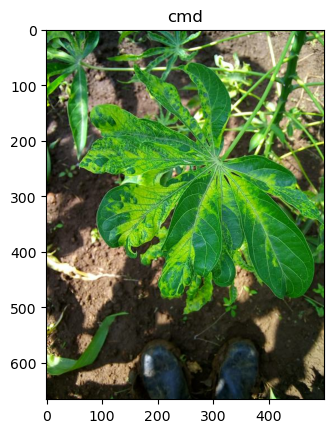

In [6]:
# Convert numbers into labels
get_label_name = metadata.features['label'].int2str

# Show an image
for image,label in train.take(1):
    # Plot the image
    plt.imshow(image)
    # Set the label as the title
    plt.title(get_label_name(label))